Рыженко Ю.В.

# Лабораторная работа №3

Выполните классическое и рандомизированное сингулярное разложение одной из цветовых компонент приложенного изображения.

Какое число сингулярных значений требуется для достаточно качественного восстановления изображения?

Как различается время расчета для этих двух видов разложения на вашем компьютере?

Результат работы в виде файла Jupyter Notebook или файла Python загрузите на проверку или разместите на общедоступном ресурсе и загрузите ссылку.

Wall time: 153 ms


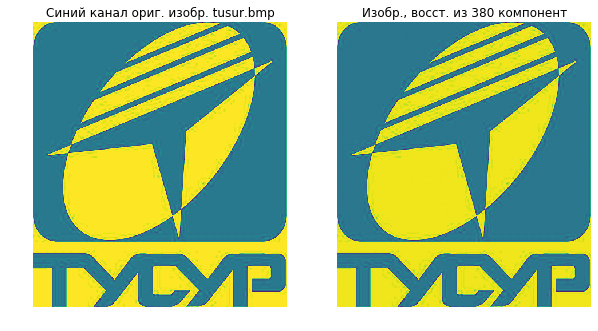

In [69]:
from io import BytesIO
import numpy as np
from PIL import Image
import imageio
import matplotlib.pyplot as plt
%matplotlib inline



rank = 380                                                                       # Определение числа учитываемых компонент


def power_iteration(A, Omega, power_iter = 3): # Функция для метода степенных итераций
    Y = A @ Omega                              # Начальное значение матрицы Y считается так же
    for q in range(power_iter):
        Y = A @ (A.T @ Y)                      # С помощью метода степенных итераций значение матрицы Y корректируется
    Q, _ = np.linalg.qr(Y)                     # Матрица Q рассчитывается из Y так же как и раньше
    return Q

def rsvd(A, Omega):                            # Далее расчет не претерпевает изменений, просто теперь в функции rsvd()
    Q = power_iteration(A, Omega)              # вызывается определенная выше функция power_iteration()
    B = Q.T @ A
    u_tilde, s, v = np.linalg.svd(B, full_matrices = 0)
    u = Q @ u_tilde
    return u, s, v

image = imageio.imread("D:/Altair/Project/2021/Повышение квалификации/tusur.bmp", pilmode="RGB")    # считываем изображение из файла в переменную
A = image[:, :, 2]                                                                   # Записываем в матрицу А значения для одного канала (Green)
%time u, s, v = np.linalg.svd(A, full_matrices = 0)                                  # Выполняем SVD и выводим время расчета сингулярного разложения


plt.subplots(1, 2, figsize=(10, 10))                                                 # Задаем формат вывода нескольких изображений, 1 строка, 2 колонки
plt.subplot(1, 2, 1)                                                                 # Вывод первого изображения
plt.imshow(A)
plt.title('Синий канал ориг. изобр. tusur.bmp')
plt.axis('off')                                                                     # отключаем вывод осей координат, они нам не требуются

plt.subplot(1, 2, 2)                                                                # Вывод второго изображения
plt.imshow(u[:, : rank] @ np.diag(s[: rank]) @ v[: rank, :])                        # восстанавливаем изображение из 50 рассчитанных компонент
plt.title('Изобр., восст. из '+ str(rank) + ' компонент')
plt.axis('off')                                                                     # отключаем вывод осей координат, они нам не требуются
plt.show()                                                                          # вывод изображений в блокнот Jupyter



Визуально показалось что почти правдоподобное изображение получается при использовании rank = 380
Время преобразования для 380 компонент - 169 мс

## Рандомизированное SVD

Wall time: 178 ms


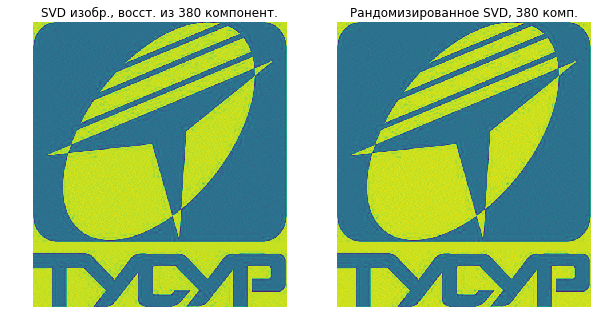

In [72]:
plt.subplots(1, 2, figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(u[:, : rank] @ np.diag(s[: rank]) @ v[: rank, :])
plt.title('SVD изобр., восст. из '+ str(rank) + ' компонент.')
plt.axis('off')


Omega = np.random.randn(A.shape[1], rank)
%time u, s, v = rsvd(A, Omega)

plt.subplot(1, 2, 2)
plt.imshow(u[:, : rank] @ np.diag(s[: rank]) @ v[: rank, :])
plt.title('Рандомизированное SVD, ' + str(rank) + ' комп.')
plt.axis('off')
plt.show()

Рандомизированное SVD для 380 компонент 176 мс, а реалистичное изображение получается при rank=500 компонентах